In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns

from src.cluestering import cluestering
from src.utils import *

# sns.set()

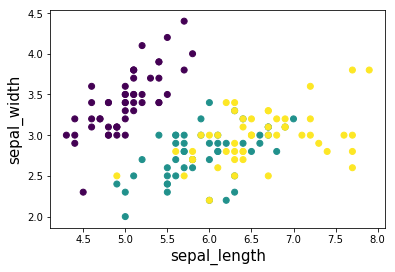

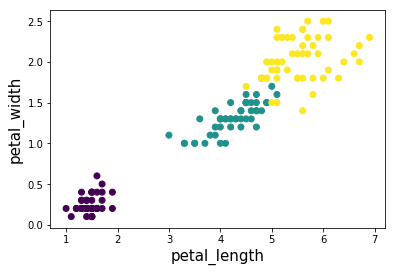

In [4]:
iris = load_iris_to_df()
plot_2d(iris, 'sepal_length', 'sepal_width')
plot_2d(iris, 'petal_length', 'petal_width')

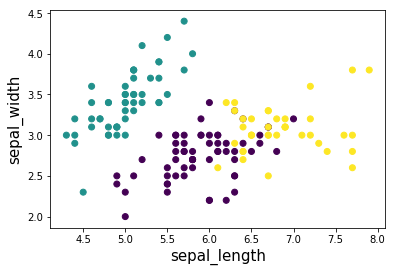

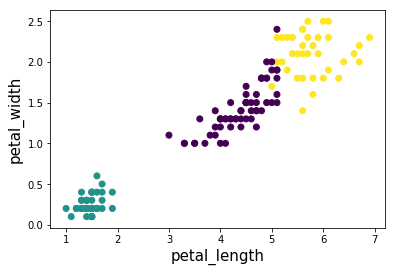

In [7]:
iris_data = iris.drop('label', 1)
iris_kmeans = cluestering(iris_data, 'kmeans', 3)
plot_2d(iris_kmeans, 'sepal_length', 'sepal_width')
plot_2d(iris_kmeans, 'petal_length', 'petal_width')

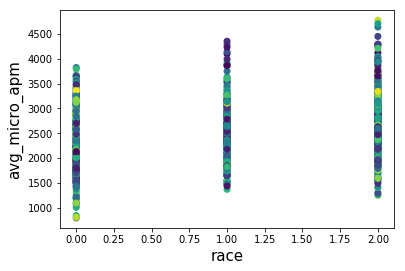

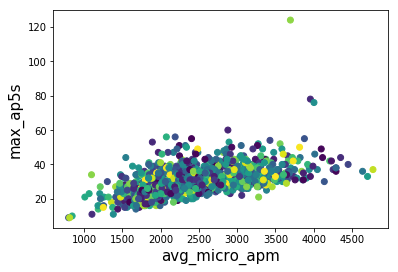

In [9]:
sc = load_starcraft_to_df()
plot_2d(sc, 'race', 'avg_micro_apm')
plot_2d(sc, 'avg_micro_apm', 'max_ap5s')

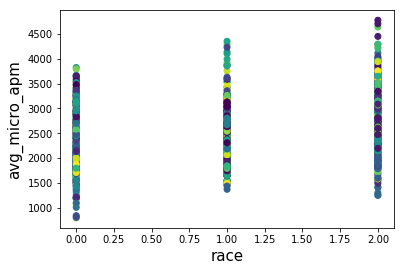

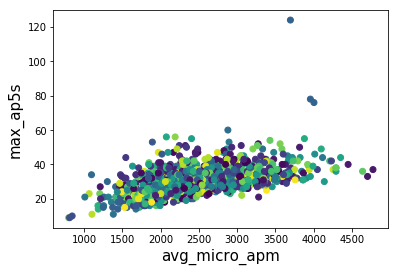

In [11]:
sc_nl = sc.drop('label', 1)
sc_kmeans = cluestering(sc_nl, 'kmeans', 200)
plot_2d(sc_kmeans, 'race', 'avg_micro_apm')
plot_2d(sc_kmeans, 'avg_micro_apm', 'max_ap5s')